In [30]:
from utils import *
import pandas as pd
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Overview of the immigration data

Here I'm using immigration data which contains all immigration related information from 1820 to 2022.

## preprocess data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "2023_0818_plcy_yearbook_lawful_permanent_residents_fy2022.xlsx"
df_all_immigrants = pd.read_excel(file_path, sheet_name='Table 2', skiprows=4, header=1)
df_all_immigrants.set_index('Region and country of last residence1', inplace=True)
df_all_immigrants.dropna(how='all', inplace=True)
df_all_immigrants.index = df_all_immigrants.index.map(lambda x: ''.join(filter(str.isalpha, str(x))))
df_all_immigrants.index = df_all_immigrants.index.str.replace(' ', '').str.replace(',', '')

# Print the updated index
print(type(df_all_immigrants.index))
print(df_all_immigrants.head())
print(df_all_immigrants.tail())

<class 'pandas.core.indexes.base.Index'>
                                       1820 to 1829  1830 to 1839  \
Region and country of last residence1                               
Total                                      128502.0      538381.0   
Europe                                      99618.0      422853.0   
AustriaHungary                                  0.0           0.0   
Austria                                         0.0           0.0   
Hungary                                         0.0           0.0   

                                       1840 to 1849  1850 to 1859  \
Region and country of last residence1                               
Total                                     1427337.0     2814554.0   
Europe                                    1369423.0     2622617.0   
AustriaHungary                                  0.0           0.0   
Austria                                         0.0           0.0   
Hungary                                         0.0          

The following plots show how immigration numbers change over time.\
I group the data by different continents. 

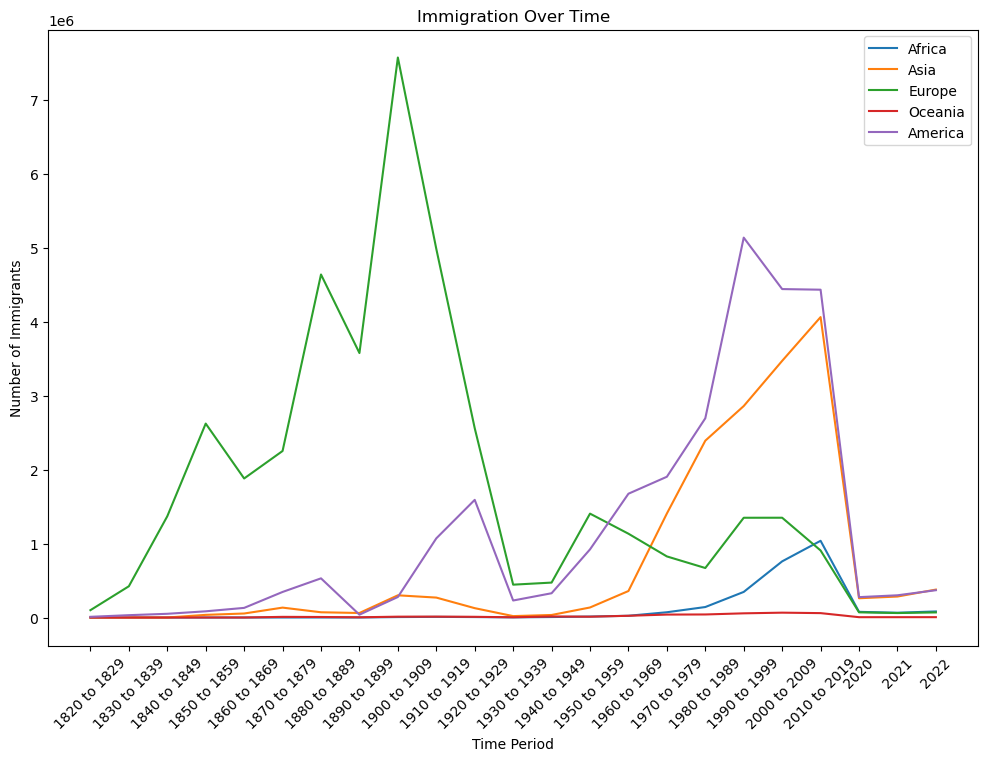

In [34]:
continents = ['Africa', 'Asia', 'Europe', 'Oceania', 'America']
plot_immigration_over_time(df_all_immigrants, continents)

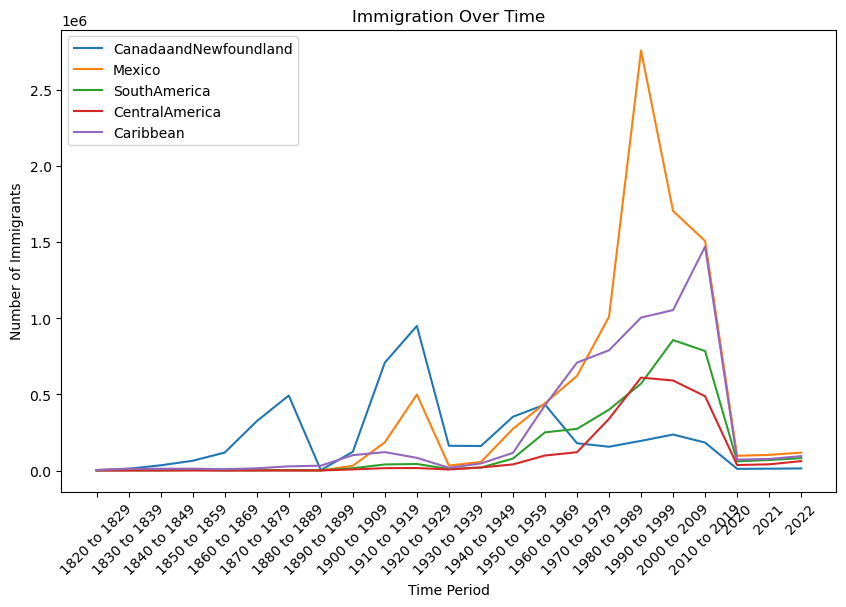

In [16]:
America = ['CanadaandNewfoundland', 'Mexico', 'SouthAmerica', 'CentralAmerica', 'Caribbean']
plot_immigration_over_time(df_all_immigrants, America)

The policy change will have a direct impact on the immigration patterns.\
This is an example: The Chinese Exclusion Act of 1882\
The Chinese Exclusion Act was approved on May 6, 1882. It was the first significant law restricting immigration into the United States. This act provided an absolute 10-year ban on Chinese laborers immigrating to the United States.\
Based on this policy, we may have this hypothesis: the number of Chinese immigrants (1880-1889) would decrease, but they would still be the majority. 

According to the figure, the hypothesis is correct.


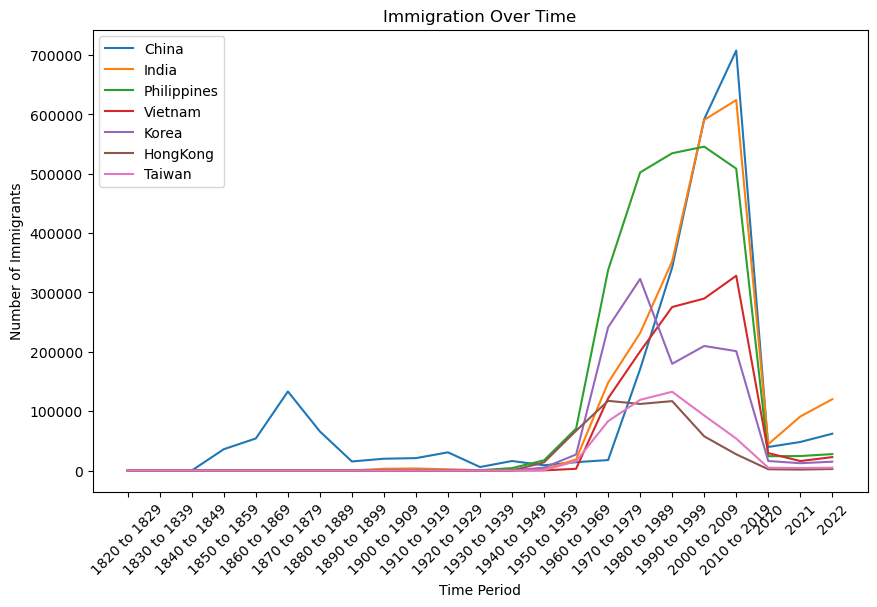

In [17]:
Asia = ['China', 'India', 'Philippines', 'Vietnam', 'Korea', 'HongKong', 'Taiwan']
plot_immigration_over_time(df_all_immigrants, Asia)

Another example is The Immigration Act of 1924.\
The Immigration Act of 1924, or Johnson–Reed Act, including the Asian Exclusion Act and National Origins Act, was a federal law that prevented immigration from Asia and set quotas on the number of immigrants from Eastern and Southern Europe.\
So the hypothesis may be: the number of immigrants that from Southern and Eastern Europe would decrease, the number of immigrants that from Western and Northern Europe would increase, but the overall number of European immigrants would decrease.

According to the figure, the hypothesis is not correct. All immigration numbers decreased. I guess that's because of the First World War.

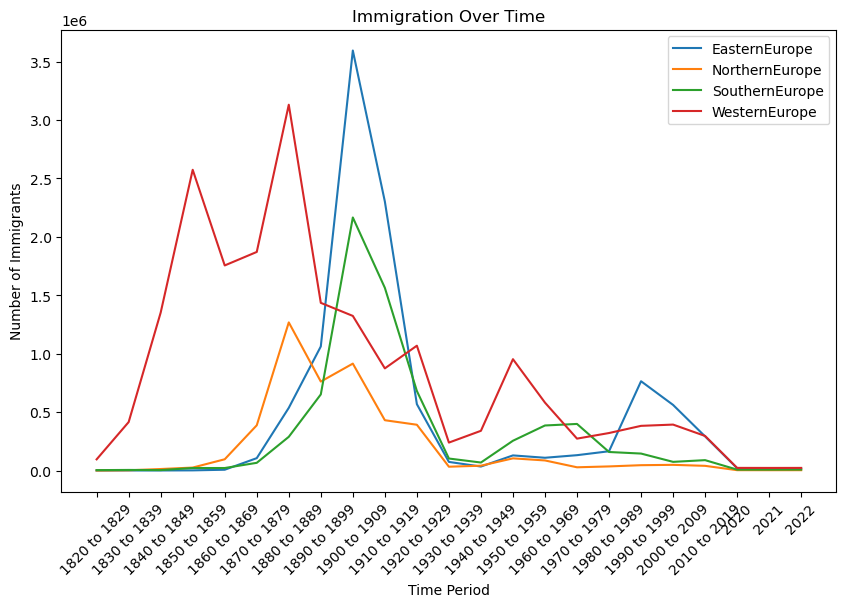

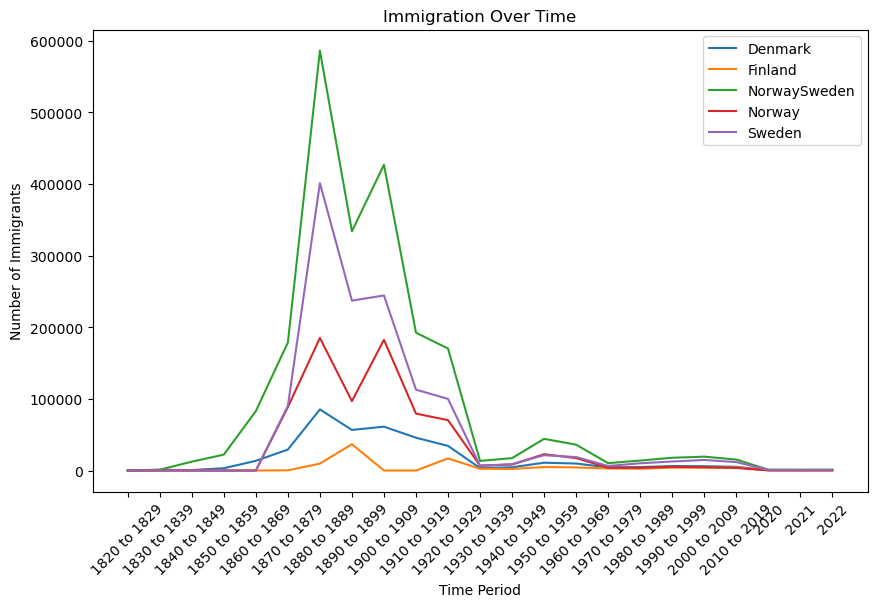

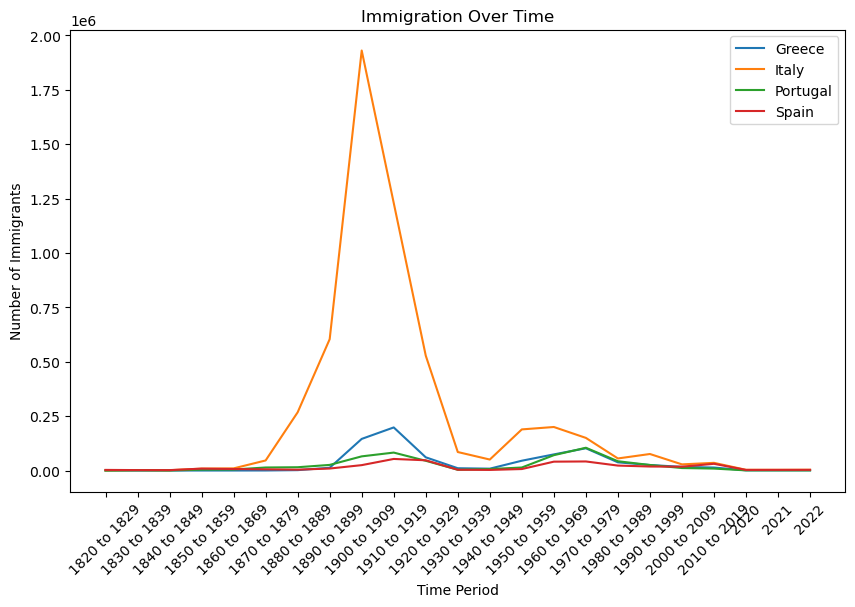

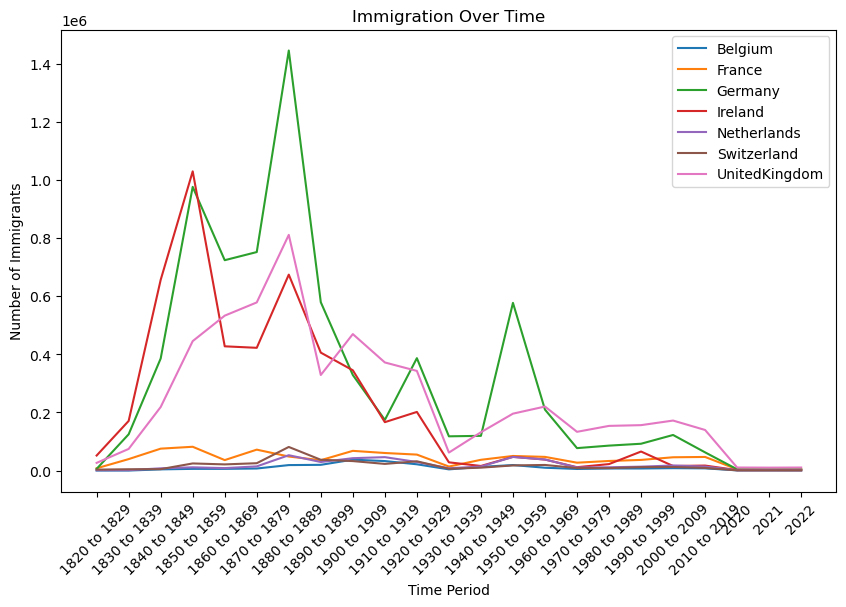

In [20]:
EasternEurope = ["AustriaHungary", "Bulgaria", "Czechoslovakia", "Poland", "Romania", "Russia", "Yugoslavia"]
df_all_immigrants.loc["EasternEurope"] = df_all_immigrants.loc[EasternEurope].sum()
NorthernEurope = ["Denmark", "Finland", "NorwaySweden", "Norway", "Sweden"]
df_all_immigrants.loc["NorthernEurope"] = df_all_immigrants.loc[NorthernEurope].sum()
SouthernEurope = ["Greece", "Italy", "Portugal", "Spain"]
df_all_immigrants.loc["SouthernEurope"] = df_all_immigrants.loc[SouthernEurope].sum()
WesternEurope = ["Belgium", "France", "Germany", "Ireland", "Netherlands", "Switzerland", "UnitedKingdom"]
df_all_immigrants.loc["WesternEurope"] = df_all_immigrants.loc[WesternEurope].sum()
all_Europe = ["EasternEurope", "NorthernEurope", "SouthernEurope", "WesternEurope"]
plot_immigration_over_time(df_all_immigrants, all_Europe)
plot_immigration_over_time(df_all_immigrants, NorthernEurope)
plot_immigration_over_time(df_all_immigrants, SouthernEurope)
plot_immigration_over_time(df_all_immigrants, WesternEurope)

# Green card type

The greencard type is also important. Here I try to figure out the proportion of applicants' birthplaces for different green card types

## Overview by region (fiscal 2022)

In [3]:
df_type_region = pd.read_excel(file_path, sheet_name='Table 10d', skiprows=4, header=1)
df_type_region.set_index('Region and country of birth', inplace=True)
df_type_region.dropna(how='all', inplace=True)
# Print the updated index

print(df_type_region.tail())
print(df_type_region.index)

                              Total Immediate relatives of U.S. citizens  \
Region and country of birth                                                
Yemen                        5648.0                                 2585   
Zambia                        365.0                                  203   
Zimbabwe                     1433.0                                  334   
All other countries1           76.0                                   40   
Unknown                      1392.0                                  620   

                            Family-sponsored preferences  \
Region and country of birth                                
Yemen                                               2093   
Zambia                                                32   
Zimbabwe                                              69   
All other countries1                                  10   
Unknown                                              482   

                            Employment-based p

I group all data by continents, and plot the pie figure.\
Based on the figures, we can know that Asian applicants are the majority of employment-based greencard.\
I'll focus on this kind of greencard in my analysis. (Since I'm Asian ^_^)

In [4]:
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America", "Unknown"]

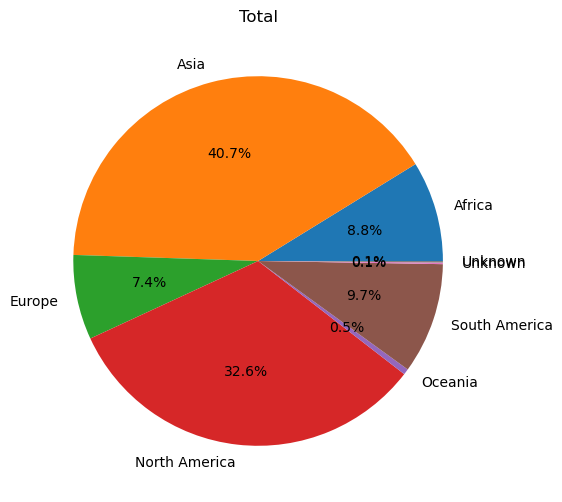

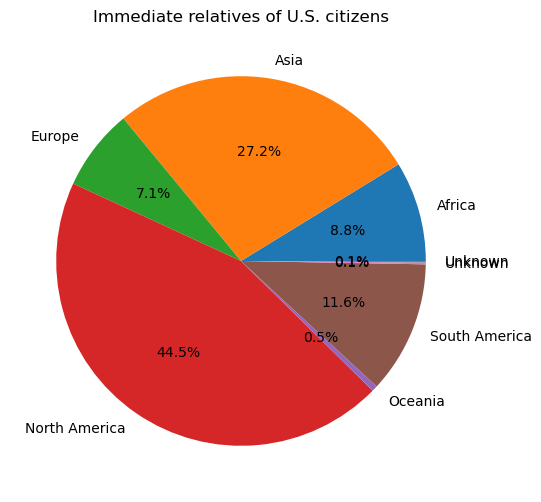

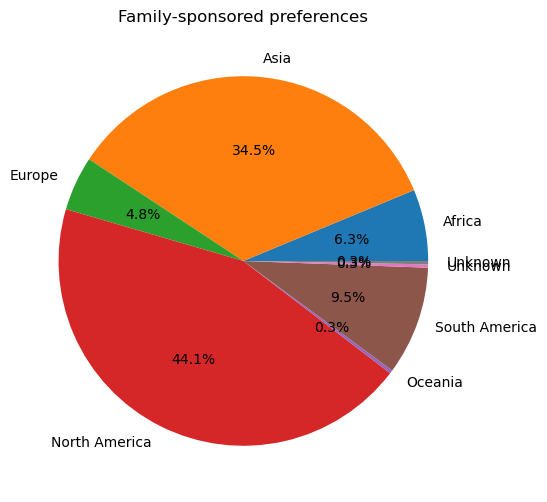

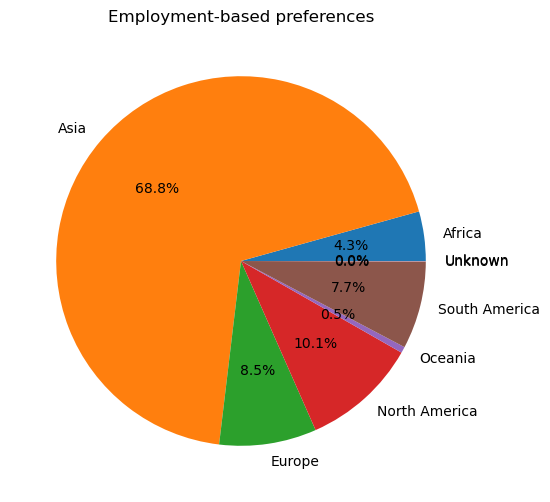

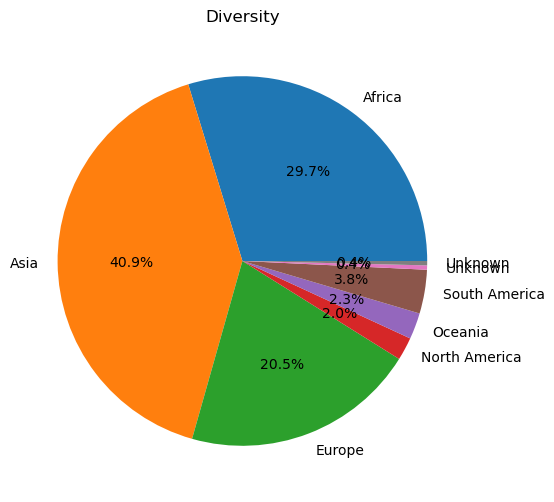

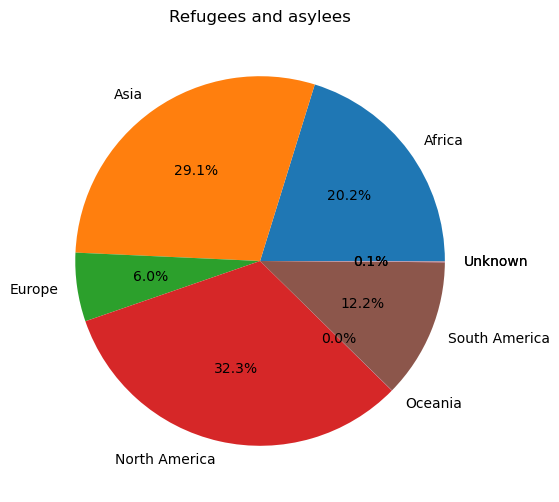

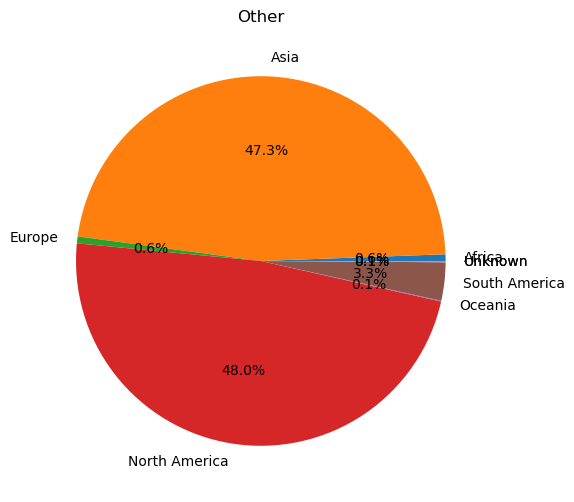

In [5]:
plot_percentage_pie(df_type_region, continents, 'Total')
plot_percentage_pie(df_type_region, continents, "Immediate relatives of U.S. citizens")
plot_percentage_pie(df_type_region, continents, "Family-sponsored preferences")
plot_percentage_pie(df_type_region, continents, "Employment-based preferences")
plot_percentage_pie(df_type_region, continents, "Diversity")
plot_percentage_pie(df_type_region, continents, "Refugees and asylees")
plot_percentage_pie(df_type_region, continents, "Other")

# Receiving states

When you decide to move to a new country, the first thing you need to consider about is the new home location.\
I analyze the receiving states data in 2 aspects:\
(1) Which states receive the most immigrants?\
(2) Do people from different continents have different preferences towards the receiving states?

In [30]:
file_path = "/Users/guoshuyi/Desktop/2024Spr_projects/2023_0818_plcy_yearbook_lawful_permanent_residents_fy2022.xlsx"
df_receiving_states = pd.read_excel(file_path, sheet_name='LPRSuppTable 1d', skiprows=4, header=1)
df_receiving_states.set_index('Region and country of birth', inplace=True)
df_receiving_states.dropna(how='all', inplace=True)
df_receiving_states.replace('D', np.nan, inplace=True)

print(df_receiving_states.head())
print(df_receiving_states.tail())

                                 Total  Alabama  Alaska  Arizona  Arkansas  \
Region and country of birth                                                  
Total                        1018349.0   3747.0   673.0  16984.0    3391.0   
Africa                         89571.0    313.0    51.0   1277.0     197.0   
Asia                          414951.0   1934.0   306.0   5032.0    1345.0   
Europe                         75606.0    205.0   103.0    839.0     133.0   
North America                 332672.0    975.0   136.0   9161.0    1527.0   

                             California  Colorado  Connecticut  Delaware  \
Region and country of birth                                                
Total                          182921.0   11410.0      11219.0    2385.0   
Africa                           5405.0    1299.0        788.0     389.0   
Asia                            98105.0    3855.0       3759.0    1025.0   
Europe                          12454.0     848.0       1393.0     152.0 

In [33]:
df_receiving_states.to_csv('receiving_states.csv')

Based on the following figures, we can see that Texas, New York, California are the most popular destinations.

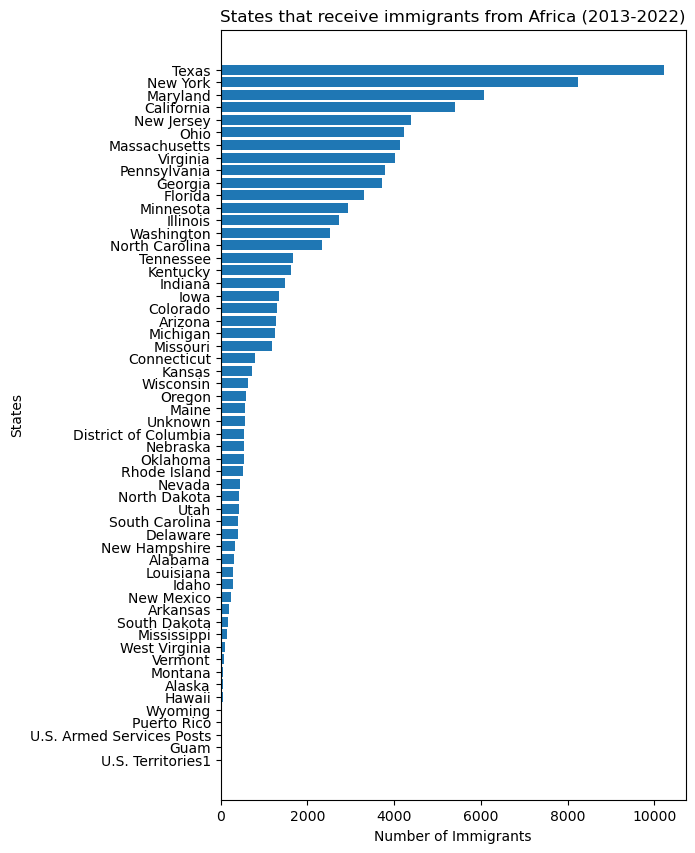

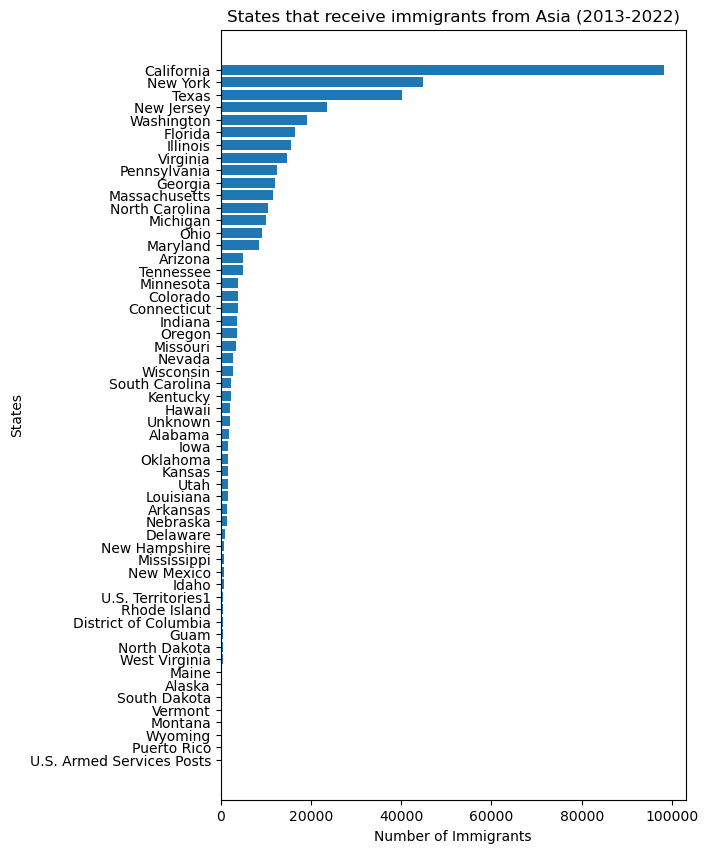

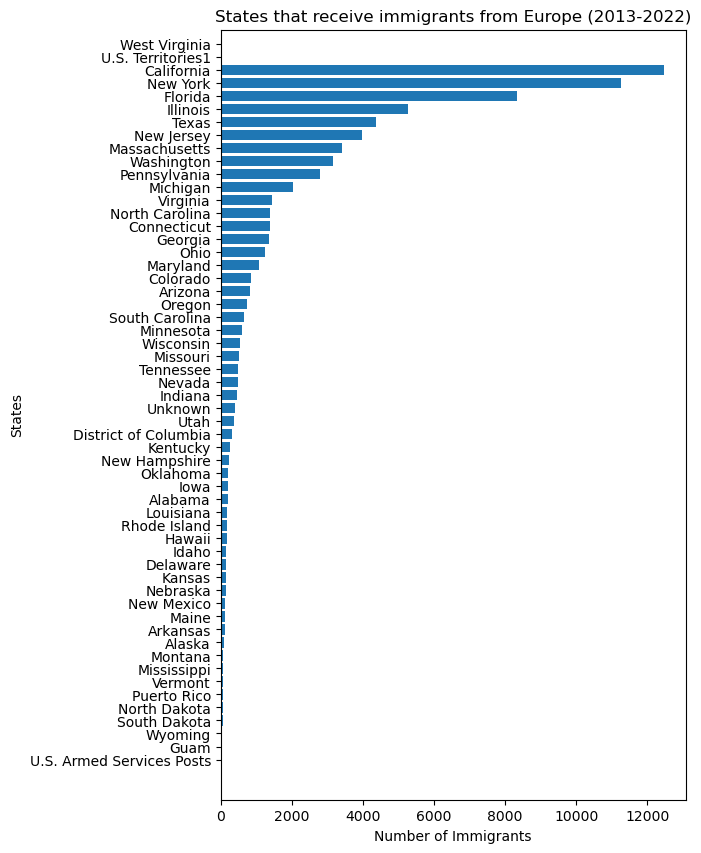

In [31]:
plot_states_bar(df_receiving_states, 'Africa')
plot_states_bar(df_receiving_states, 'Asia')
plot_states_bar(df_receiving_states, 'Europe')


Based on the following figures, we can see that immigrants from different continents do have different preferences.

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_98951/1030242194.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states['center'] = us_states['geometry'].centroid


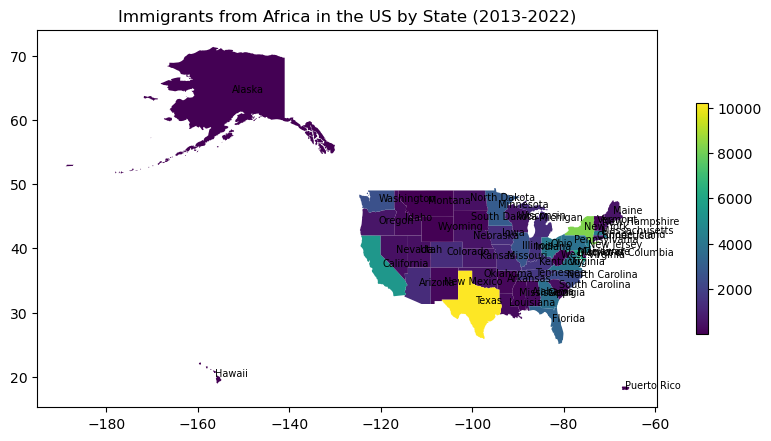

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_98951/1030242194.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states['center'] = us_states['geometry'].centroid


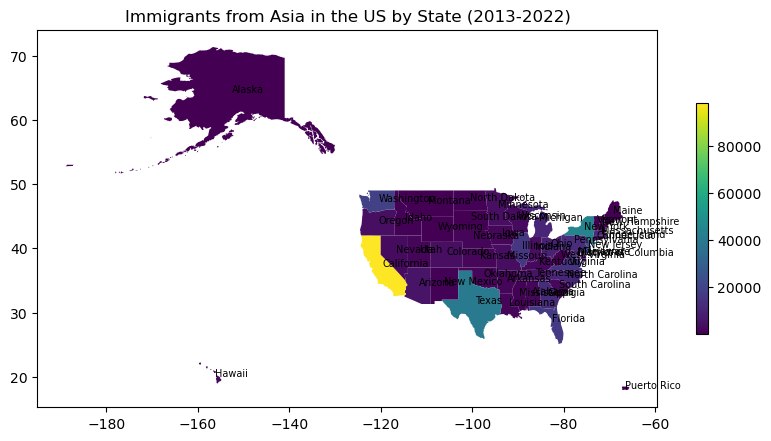

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_98951/1030242194.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states['center'] = us_states['geometry'].centroid


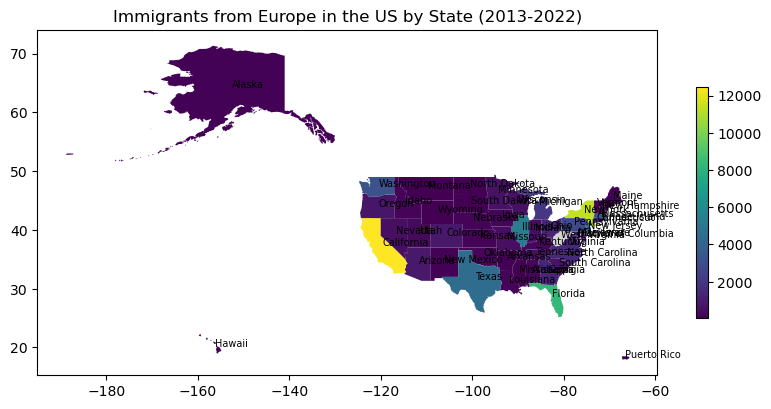

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_98951/1030242194.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states['center'] = us_states['geometry'].centroid


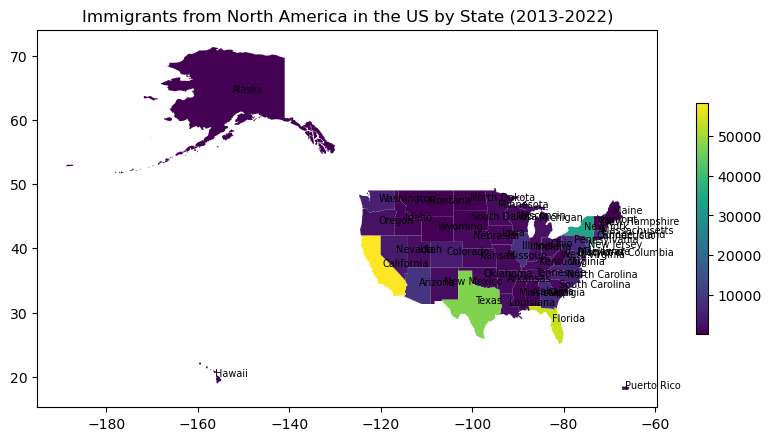

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_98951/1030242194.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states['center'] = us_states['geometry'].centroid


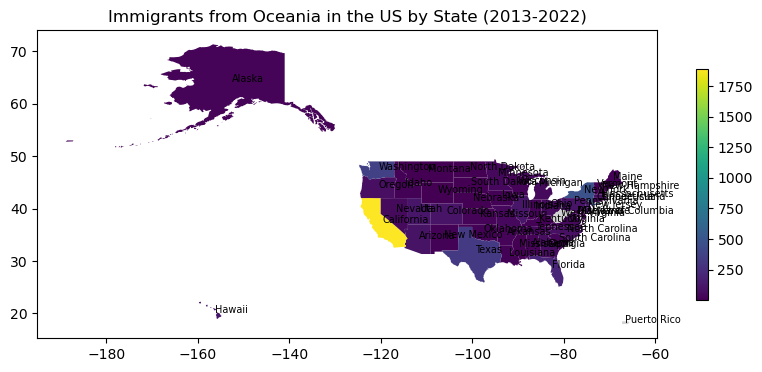

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_98951/1030242194.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states['center'] = us_states['geometry'].centroid


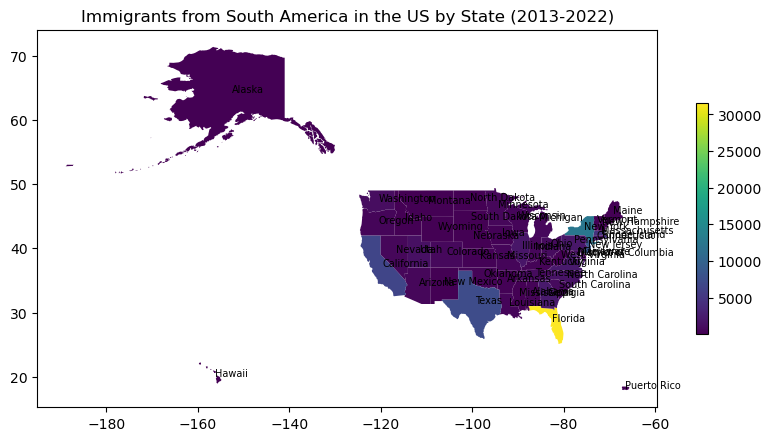

In [77]:
df = pd.read_csv('receiving_states.csv')
plot_map(df, "Africa")
plot_map(df, "Asia")
plot_map(df, "Europe")
plot_map(df, "North America")
plot_map(df, "Oceania")
plot_map(df, "South America")

# PERM green card

## prepare data

The column names of each year's data are different. We need to preprocess them carefully.

Firstly, choose some columns that we may use later.

In [13]:
# This is valid for year 2008-2012
required_columns_1 = ["CASE_STATUS","EMPLOYER_NAME", 'Job_Info_Work_State',
                        'PW_JOB_TITLE_9089', 'PW_LEVEL_9089', 'PW_AMOUNT_9089',
                        'COUNTRY_OF_CITZENSHIP']

In [14]:
# This is valid for year 2013-2014
required_columns_2 = ["CASE_STATUS","EMPLOYER_NAME", 'Job_Info_Work_State',
                        'PW_SOC_TITLE', 'PW_LEVEL_9089', 'PW_AMOUNT_9089',
                        'COUNTRY_OF_CITIZENSHIP']

In [15]:
# This is valid for year 2015-2019
required_columns_3 = ["CASE_STATUS","EMPLOYER_NAME", 'Job_Info_Work_State',
                        'PW_SOC_TITLE', 'PW_LEVEL_9089', 'PW_AMOUNT_9089',
                        'FOREIGN_WORKER_INFO_EDUCATION', 'FOREIGN_WORKER_INFO_MAJOR',
                        'FW_INFO_BIRTH_COUNTRY']

In [16]:
# This is valid for year 2020-2023
required_columns_4 = ["CASE_STATUS","EMPLOYER_NAME", "WORKSITE_STATE",
                        "PW_SOC_TITLE", "PW_SKILL_LEVEL", "PW_WAGE",
                        "FOREIGN_WORKER_EDUCATION", "FOREIGN_WORKER_INFO_MAJOR",
                        "FOREIGN_WORKER_BIRTH_COUNTRY"]

Secondly, get all file paths, check if each file contains the required columns.

In [11]:
file_paths = get_all_file_paths("/Users/guoshuyi/Desktop/PERM_data")
print(file_paths)

['/Users/guoshuyi/Desktop/PERM_data/PERM_2022.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2023.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2021.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2009.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2008.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2020.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2018.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2019.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2017.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2016.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2014.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2015.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2011.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2010.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2012.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2013.csv']


In [19]:
qualified_files_1 = get_perm_data_path(file_paths, required_columns_1)
qualified_files_2 = get_perm_data_path(file_paths, required_columns_2)
qualified_files_2 = qualified_files_2[0:2]
qualified_files_3 = get_perm_data_path(file_paths, required_columns_3)
qualified_files_4 = get_perm_data_path(file_paths, required_columns_4)

['/Users/guoshuyi/Desktop/PERM_data/PERM_2008.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2009.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2010.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2011.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2012.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2013.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2014.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2015.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2016.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2017.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2018.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2019.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2015.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2016.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2017.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2018.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2019.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2020.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2021.csv', '/Users/guoshuyi/Desktop/PE

In [209]:
print(qualified_files_1)
print(qualified_files_2)
print(qualified_files_3)
print(qualified_files_4)

['/Users/guoshuyi/Desktop/PERM_data/PERM_2008.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2009.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2010.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2011.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2012.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2013.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2014.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2015.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2016.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2017.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2018.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2019.csv']
['/Users/guoshuyi/Desktop/PERM_data/PERM_2020.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2021.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2022.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2023.csv']


In [212]:
for file in qualified_files_1:
    df_1 = read_perm_data(qualified_files_1, required_columns_1)
    df_1["birth country"] = None
    df_1["major"] = None
    df_1["education"] = None
    df_1 = df_1.rename(columns={"job info work state": "worksite state",
                                "pw job title 9089": "job title",
                                "pw level 9089": "job level",
                                "pw amount 9089": "wage",
                                "country of citzenship": "country of citizenship"})
print(df_1.head())

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memo

  case status                      employer name worksite state     job title  \
0      DENIED           DC GRILL INC T/A DC CAFE             DC  UNCLASSIFIED   
1      DENIED    NAG INC DBA ENGINEERING SYSTEMS             CA  UNCLASSIFIED   
2   CERTIFIED            UNION ENTERPRISES, INC.             MD  UNCLASSIFIED   
3      DENIED           CIVIL CONSTRUCTION, LLC.             MD  UNCLASSIFIED   
4      DENIED  AMSERA GENERAL BEAUTY MERCHANDISE             NJ  UNCLASSIFIED   

  job level  wage country of citizenship  Year birth country major education  
0       NaN   NaN             MAURITANIA  2008          None  None      None  
1       NaN   NaN               PAKISTAN  2008          None  None      None  
2       NaN   NaN            PHILIPPINES  2008          None  None      None  
3       NaN   NaN               PORTUGAL  2008          None  None      None  
4       NaN   NaN           SIERRA LEONE  2008          None  None      None  


/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [214]:
for file in qualified_files_2:
    df_2 = read_perm_data(qualified_files_2, required_columns_2)
    df_2["birth country"] = None
    df_2["major"] = None
    df_2["education"] = None
    df_2 = df_2.rename(columns={"job info work state": "worksite state",
                                "pw soc title": "job title",
                                "pw job title 9089": "job title",
                                "pw level 9089": "job level",
                                "pw amount 9089": "wage",
                                "country of citzenship": "country of citizenship"})
print(df_2.head())

         case status                             employer name worksite state  \
0          Certified           ARCHITECTURAL STONE ACCENTS INC        GEORGIA   
1  Certified-Expired  BY MARVIC TRANSMISSION AUTO REPAIR, CORP       NEW YORK   
2          Certified                  STMICROELECTRONICS, INC.     CALIFORNIA   
3          Certified                  STMICROELECTRONICS, INC.          TEXAS   
4  Certified-Expired                  STMICROELECTRONICS, INC.        GEORGIA   

                                           job title  job level       wage  \
0  First-Line Supervisors/Managers of Production ...   Level IV      27.26   
1  Helpers--Installation, Maintenance, and Repair...   Level II      12.87   
2             Electronics Engineers, Except Computer        NaN   95498.00   
3             Electronics Engineers, Except Computer   Level IV  105685.00   
4              Software Developers, Systems Software  Level III   97427.00   

  country of citizenship  Year birth country

In [215]:
for file in qualified_files_3:
    df_3 = read_perm_data(qualified_files_3, required_columns_3)
    df_3 = df_3.rename(columns={"job info work state": "worksite state",
                                "pw soc title": "job title",
                                "pw level 9089": "job level",
                                "pw amount 9089": "wage",
                                "fw info birth country": "birth country",
                                "foreign worker info major": "major",
                                "foreign worker info education": "education"})
print(df_3.head())

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,

         case status               employer name worksite state  \
0  Certified-Expired      UNION PACIFIC RAILROAD       NEBRASKA   
1  Certified-Expired          VST CONSULTING INC     NEW JERSEY   
2  Certified-Expired                 GOOGLE INC.     CALIFORNIA   
3  Certified-Expired           INTEL CORPORATION     CALIFORNIA   
4  Certified-Expired  NET ESOLUTIONS CORPORATION       VIRGINIA   

                                job title  job level       wage   education  \
0       Software Developers, Applications  Level III  76,482.00  Bachelor's   
1       Software Developers, Applications  Level III  90,459.00    Master's   
2       Software Developers, Applications   Level II  98,675.00    Master's   
3  Electronics Engineers, Except Computer        NaN  80,617.00    Master's   
4       Software Developers, Applications   Level II  87,422.00    Master's   

                                          major birth country  Year  
0                              COMPUTER SCIENCE     

In [ ]:
# This is valid for year 2020-2023
required_columns_4 = ["CASE_STATUS","EMPLOYER_NAME", "WORKSITE_STATE",
                        "PW_SOC_TITLE", "PW_SKILL_LEVEL", "PW_WAGE",
                        "FOREIGN_WORKER_EDUCATION", "FOREIGN_WORKER_INFO_MAJOR",
                        "FOREIGN_WORKER_BIRTH_COUNTRY"]

In [217]:
for file in qualified_files_4:
    df_4 = read_perm_data(qualified_files_4, required_columns_4)
    df_4 = df_4.rename(columns={"pw soc title": "job title",
                                "pw skill level": "job level",
                                "pw wage": "wage",
                                "foreign worker birth country": "birth country",
                                "foreign worker info major": "major",
                                "foreign worker education": "education"})
print(df_4.head())

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (6,16,19,85,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (5,6,16,19,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (5,6,16,19,85,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (5,6,16,19,101,102,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_85688/1828802988.py:9: DtypeWarning: Columns (6,16,19,

         case status             employer name worksite state  \
0             Denied    SATURN ENTERPRISES INC       ILLINOIS   
1          Certified    SUNRAY ENTERPRISE INC.        GEORGIA   
2  Certified-Expired                FIL PARONG       MARYLAND   
3             Denied  GLENNS PLUMBING SERVICES       NEW YORK   
4          Certified   ASTIR IT SOLUTIONS, INC     NEW JERSEY   

                                   job title  job level         wage  \
0                   administrative assistant    Level I       $14.49   
1      Software Developers, Systems Software   Level IV  $117,000.00   
2        MAINTENANCE  REPAIR WORKER, GENERAL  Level III       $19.36   
3                                    PLUMBER   Level IV   $78,645.00   
4  Computer Software Engineers, Applications   Level II   $72,675.00   

     education                   major birth country  Year  
0  High School                 GENERAL        POLAND  2020  
1          NaN                     NaN         INDIA  

In [218]:
df = pd.concat([df_1, df_2, df_3, df_4], axis=0)

I save the processed data to avoid re-processing this every time.

In [219]:
df.to_csv("perm_data.csv", index=False)

In [20]:
all_perm = pd.read_csv("perm_data.csv")

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_42419/1556390009.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  all_perm = pd.read_csv("perm_data.csv")


I try to figure out all birth countries and categorize them into corresponding continents.

In [82]:
print(all_perm["birth country"].unique())

[nan 'INDIA' 'SOUTH KOREA' 'BANGLADESH' 'PHILIPPINES' 'CHINA'
 'UNITED KINGDOM' 'JORDAN' 'SAUDI ARABIA' 'NIGERIA' 'ISRAEL' 'COLOMBIA'
 'RUSSIA' 'SPAIN' 'PARAGUAY' 'NEPAL' 'ITALY' 'CANADA' 'SRI LANKA'
 'PAKISTAN' 'FRANCE' 'GHANA' 'EL SALVADOR' 'IRAN' 'NETHERLANDS' 'POLAND'
 'TURKEY' 'SENEGAL' 'MEXICO' 'LEBANON' 'MALAYSIA' 'NICARAGUA' 'ECUADOR'
 'ROMANIA' 'CZECH REPUBLIC' 'HONG KONG' 'SOUTH AFRICA' 'PERU' 'BRAZIL'
 'BELGIUM' 'VENEZUELA' 'VIETNAM' 'JAPAN' 'GERMANY' 'HUNGARY' 'INDONESIA'
 'HONDURAS' 'GUATEMALA' 'TAIWAN' 'UKRAINE' 'KENYA' 'ARGENTINA' 'URUGUAY'
 'HAITI' 'FINLAND' 'DOMINICAN REPUBLIC' 'SINGAPORE' 'IRELAND' 'GUYANA'
 'ETHIOPIA' 'AUSTRALIA' 'DENMARK' 'AUSTRIA' 'UNITED ARAB EMIRATES'
 'JAMAICA' 'PORTUGAL' 'GREECE' 'ZIMBABWE' 'SWEDEN' 'PALESTINE' 'SERBIA'
 'SYRIA' 'TRINIDAD AND TOBAGO' 'GRENADA' 'MONGOLIA' 'THAILAND' 'BELARUS'
 'MALTA' 'SOVIET UNION' 'BOLIVIA' 'ALGERIA' 'EGYPT' 'IRAQ' 'TAJIKISTAN'
 'SLOVAKIA' 'MACEDONIA' 'UNITED STATES OF AMERICA' 'CHILE' 'UZBEKISTAN'
 'ZAMBIA' '

In [95]:
def receiving_states_job_title(df, state_short, state, regions, title):
    df[((df["worksite state"] == state_short) | (df["worksite state"] == state)) & (df["birth country"].isin(regions))].groupby("job title").size().sort_values(ascending=False).head(10).plot(kind="barh", title=f"Top 10 Job Titles for {title} Immigrants in {state}")
    plt.show()


Based on the following figures, we can see that different states would provide different kinds of job positions.

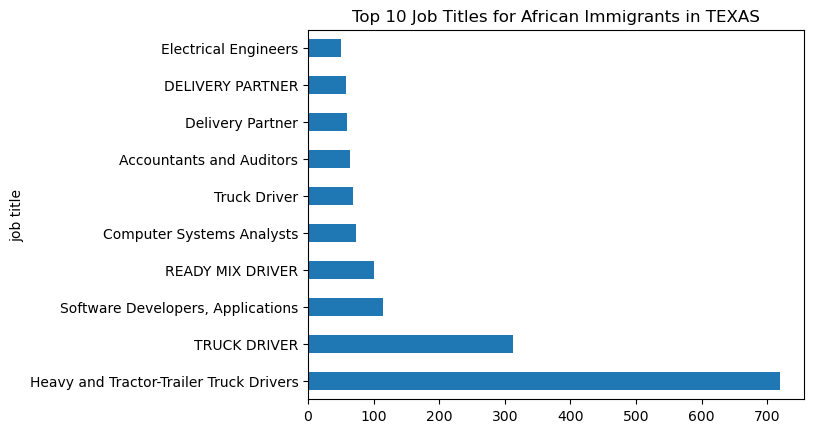

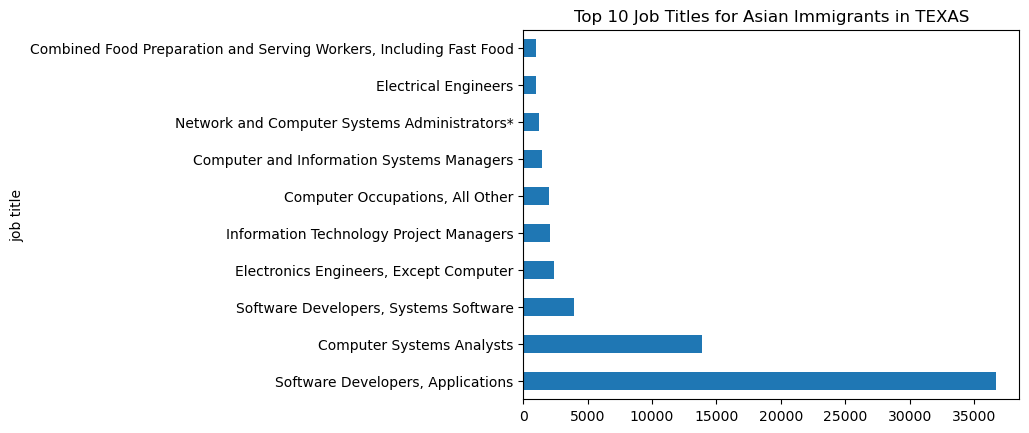

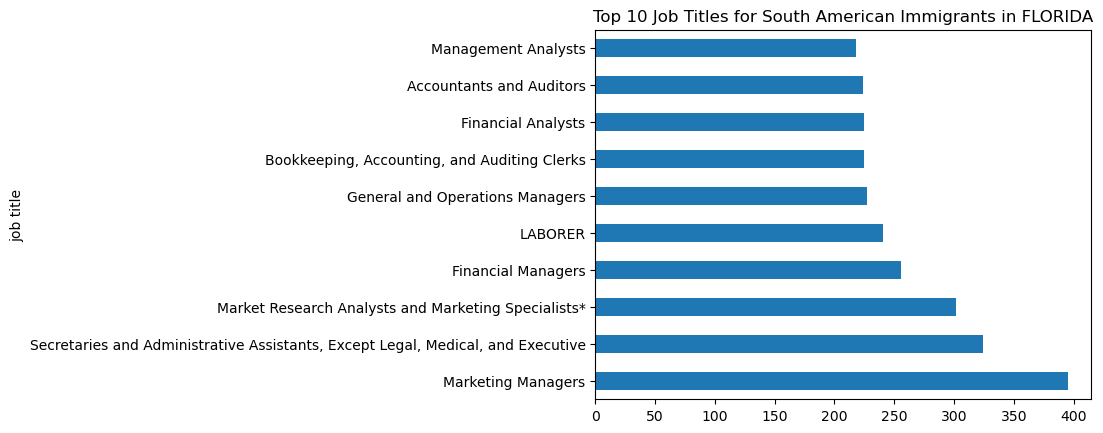

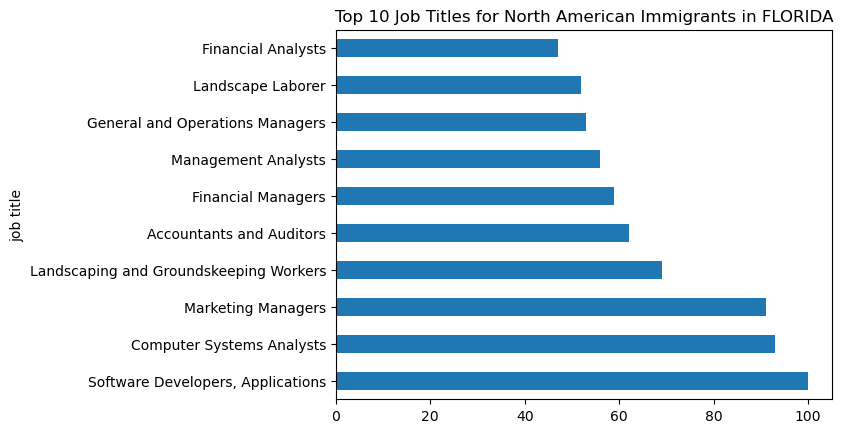

In [97]:
african_countries = [
    'NIGERIA', 'EGYPT', 'SOUTH AFRICA', 'GHANA', 'KENYA', 'SENEGAL', 'ETHIOPIA',
    'MOROCCO', 'TUNISIA', 'LIBYA', 'ALGERIA', 'SUDAN', 'TANZANIA', 'ZIMBABWE',
    'UGANDA', 'MOZAMBIQUE', 'ANGOLA', 'ZAMBIA', 'SOMALIA', 'RWANDA', 'CAMEROON',
    'BOTSWANA', 'MADAGASCAR', 'NIGER', 'BURKINA FASO', 'MALI', 'MALAWI', 
    'COTE D\'IVOIRE', 'CHAD', 'MAURITIUS', 'ERITREA', 'LIBERIA', 'NAMIBIA',
    'SIERRA LEONE', 'GUINEA', 'CONGO', 'GABON', 'MAURITANIA', 'ESWATINI',
    'EQUATORIAL GUINEA', 'DJIBOUTI', 'COMOROS', 'LESOTHO', 'SEYCHELLES', 'GAMBIA'
]

asia_countries = [
    'INDIA', 'SOUTH KOREA', 'BANGLADESH', 'PHILIPPINES', 'CHINA', 'JORDAN', 'SAUDI ARABIA',
    'ISRAEL', 'PAKISTAN', 'NEPAL', 'SRI LANKA', 'IRAN', 'MALAYSIA', 'LEBANON', 'HONG KONG',
    'UNITED ARAB EMIRATES', 'JAPAN', 'INDONESIA', 'TAIWAN', 'UKRAINE', 'VIETNAM', 'THAILAND',
    'SINGAPORE', 'GEORGIA', 'ARMENIA', 'AZERBAIJAN', 'KAZAKHSTAN', 'KYRGYZSTAN', 'UZBEKISTAN',
    'TURKMENISTAN', 'TAJIKISTAN', 'SYRIA', 'IRAQ', 'YEMEN', 'OMAN', 'QATAR', 'BAHRAIN', 'KUWAIT',
    'AFGHANISTAN', 'PALESTINIAN TERRITORIES', 'TURKEY', 'HONG KONG'
]

oceania_countries = [
    'AUSTRALIA', 'NEW ZEALAND', 'FIJI', 'PAPUA NEW GUINEA', 'SOLOMON ISLANDS', 'VANUATU',
    'NAURU', 'PALAU', 'MICRONESIA', 'SAMOA', 'KIRIBATI', 'TONGA', 'TUVALU', 'MARSHALL ISLANDS'
]
south_america_countries = [
    'COLOMBIA', 'PARAGUAY', 'BRAZIL', 'VENEZUELA', 'PERU', 'ARGENTINA', 'URUGUAY', 'CHILE',
    'ECUADOR', 'BOLIVIA', 'GUYANA', 'SURINAME'
]

north_america_countries = [
    'UNITED STATES OF AMERICA', 'CANADA', 'MEXICO', 'COSTA RICA', 'NICARAGUA', 'PANAMA',
    'GUATEMALA', 'EL SALVADOR', 'HONDURAS', 'BELIZE', 'JAMAICA', 'CUBA', 'HAITI', 'DOMINICAN REPUBLIC',
    'BAHAMAS', 'TRINIDAD AND TOBAGO', 'BARBADOS', 'GRENADA', 'SAINT VINCENT AND THE GRENADINES',
    'SAINT LUCIA', 'ANTIGUA AND BARBUDA', 'DOMINICA', 'ST KITTS AND NEVIS', 'BELIZE'
]

receiving_states_job_title(all_perm, "TX", "TEXAS", african_countries, "African")
receiving_states_job_title(all_perm, "TX", "TEXAS", asia_countries, "Asian")
receiving_states_job_title(all_perm, "FL", "FLORIDA", south_america_countries, "South American")
receiving_states_job_title(all_perm, "FL", "FLORIDA", north_america_countries, "North American")

<Axes: title={'center': 'Top 10 Job Titles for African Immigrants in California'}, ylabel='job title'>

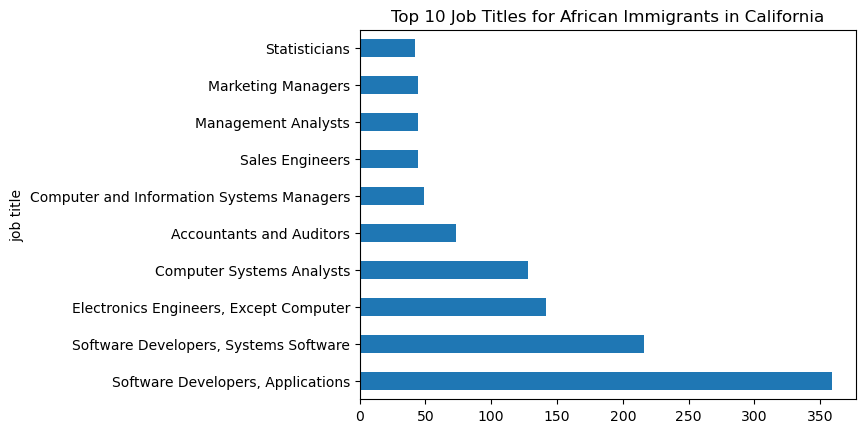

In [88]:
all_perm[((all_perm["worksite state"] == "CA") | (all_perm["worksite state"] == "CALIFORNIA")) & (all_perm["birth country"].isin(african_countries))].groupby("job title").size().sort_values(ascending=False).head(10).plot(kind="barh", title="Top 10 Job Titles for African Immigrants in California")

Here I try to explore more about the approved and denied cases.

In [39]:
all_perm["case status"] = all_perm["case status"].replace("CERTIFIED", "Certified")
all_perm["case status"] = all_perm["case status"].replace("DENIED", "Denied")
all_perm["case status"] = all_perm["case status"].replace("WITHDRAWN", "Withdrawn")
all_perm["case status"] = all_perm["case status"].replace("CERTIFIED-EXPIRED", "Certified-Expired")

Overall, the approved cases are significantly more than denied cases.

<Axes: ylabel='case status'>

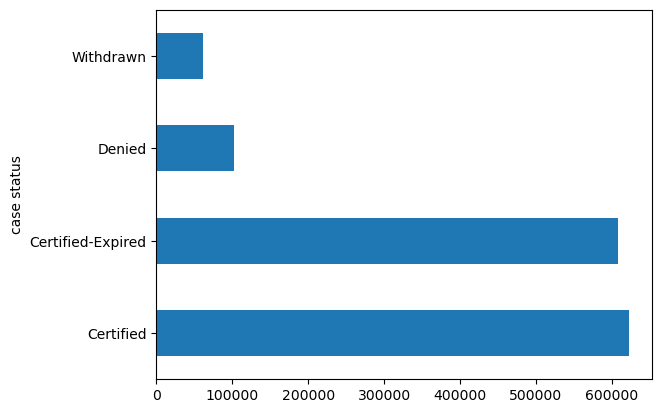

In [40]:
all_perm.groupby("case status").size().plot(kind='barh')

Among certified cases, these are the top 10 job titles.

Text(0.5, 1.0, 'Top 10 Job Titles for Certified Cases')

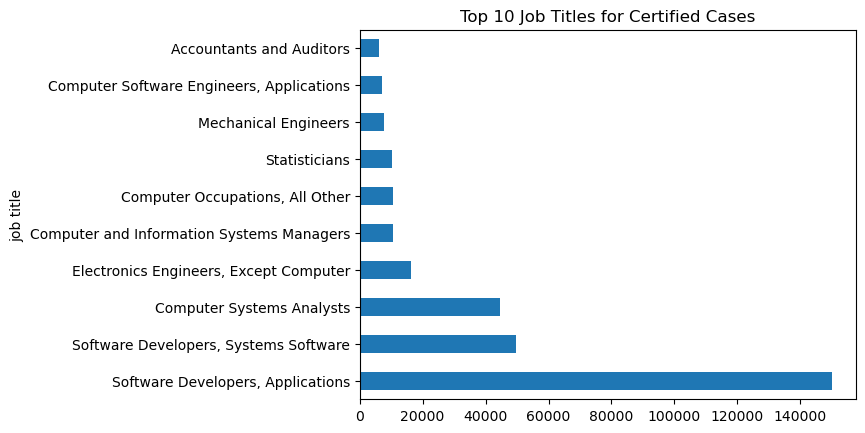

In [41]:
all_perm[all_perm["case status"] == "Certified"].groupby("job title").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Job Titles for Certified Cases")

## case status analysis

Before further analysis, we need to make sure what kind of values do we have for "case status".\
I notice that there're many "nan" so we need to remove them.

In [42]:
all_perm["case status"].unique()

array(['Denied', 'Certified', 'Certified-Expired', 'Withdrawn', nan],
      dtype=object)

This is the overall trend for number of all applicants over time.\
We can see that the number remains high since 2016.

Text(0.5, 1.0, 'Number of applications over time (case status not null)')

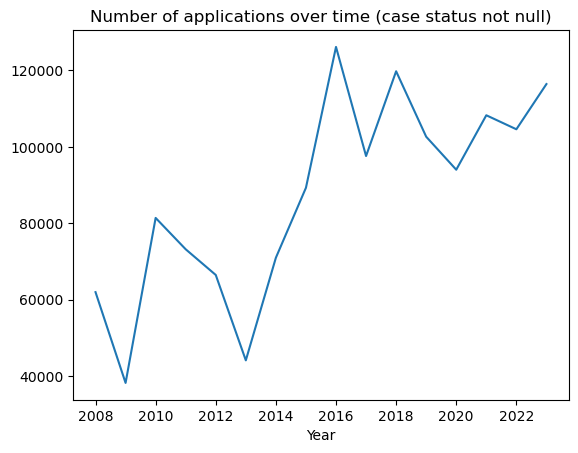

In [23]:
all_perm[all_perm["case status"].notna()].groupby("Year").size().plot(kind='line')
plt.title("Number of applications over time (case status not null)")

Text(0.5, 1.0, 'Number of Certified/Certified-Expired Cases Over Time')

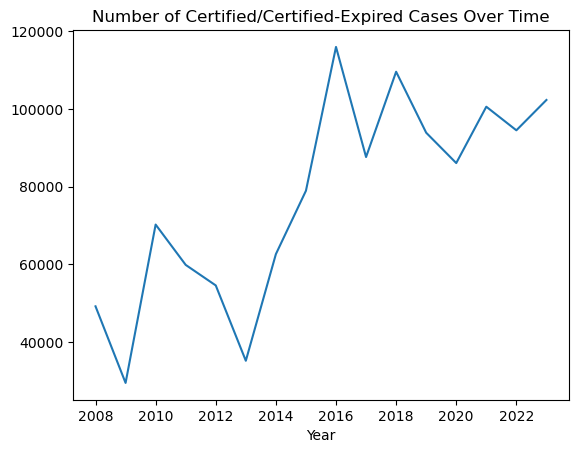

In [16]:
all_perm[(all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")].groupby("Year").size().plot(kind='line')
plt.title("Number of Certified/Certified-Expired Cases Over Time")

Text(0.5, 1.0, 'Number of Denied Cases Over Time')

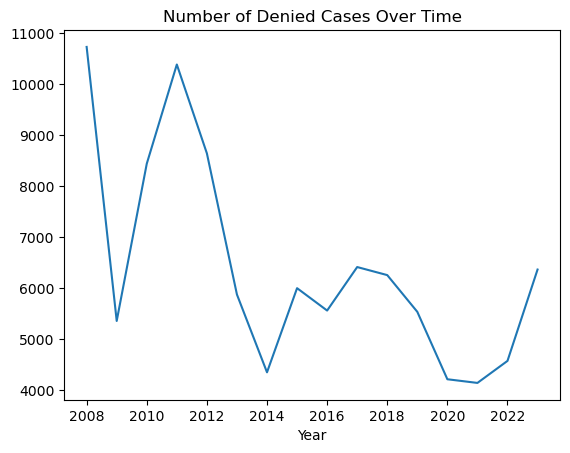

In [24]:
all_perm[all_perm["case status"] == "Denied"].groupby("Year").size().plot(kind='line')
plt.title("Number of Denied Cases Over Time")

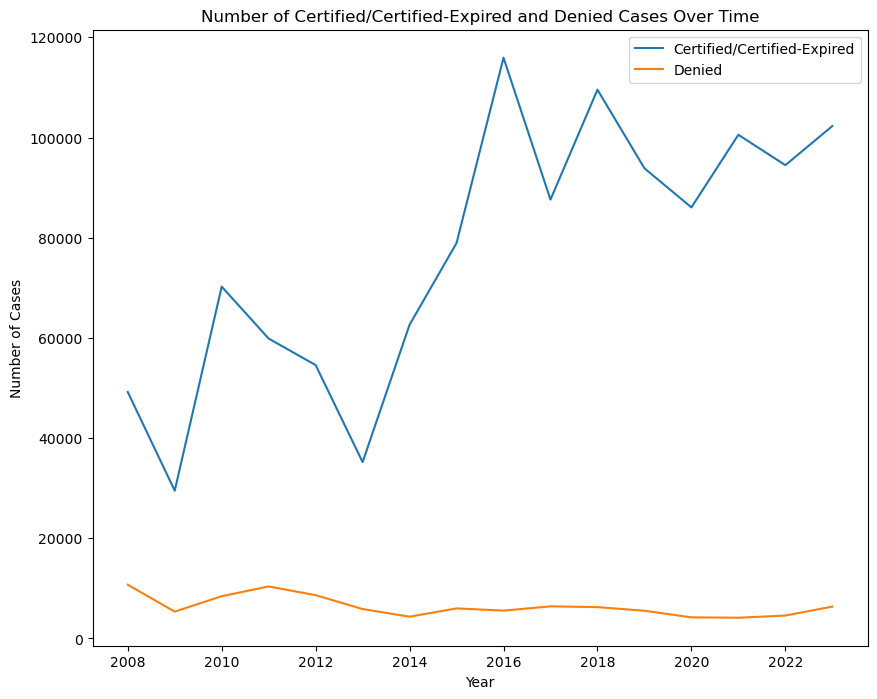

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the first line
all_perm[(all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")].groupby("Year").size().plot(kind='line', ax=ax, label="Certified/Certified-Expired")

# Plot the second line
all_perm[all_perm["case status"] == "Denied"].groupby("Year").size().plot(kind='line', ax=ax, label="Denied")

ax.set_title("Number of Certified/Certified-Expired and Denied Cases Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Cases")

ax.legend()

plt.show()

Here, we analyze the case number changes across different countries.\
We can see that the trends of China and India are similar to the overall trend.\
But the trend of South Korea is different. The number keeps decreasing.

<Axes: title={'center': 'Number of Certified/Certified-Expired Cases Over Time for China'}, xlabel='Year'>

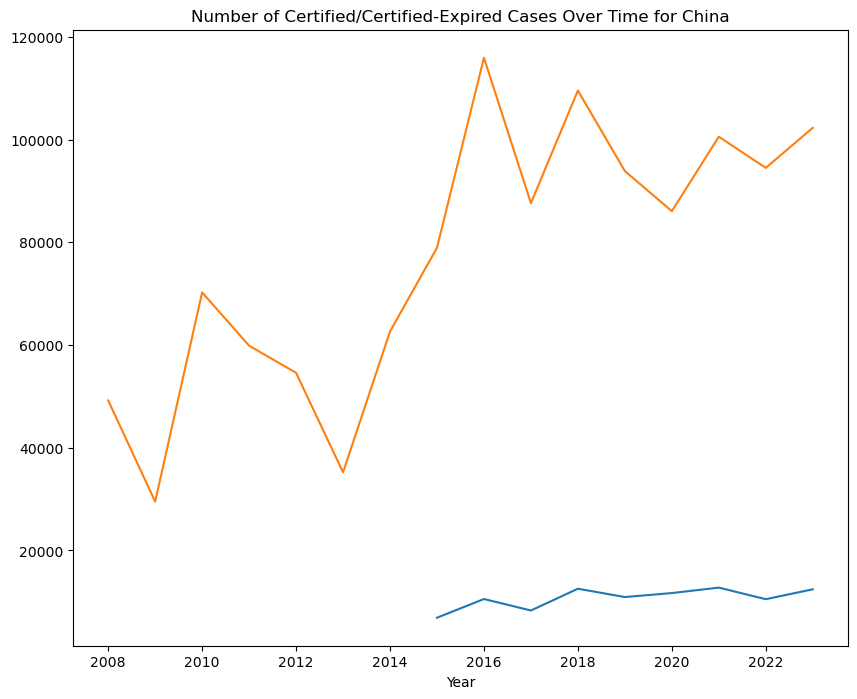

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
all_perm[((all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")) & (all_perm["birth country"] == "CHINA")].groupby("Year").size().plot(kind='line')
plt.title("Number of Certified/Certified-Expired Cases Over Time for China")
all_perm[(all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")].groupby("Year").size().plot(kind='line', ax=ax, label="Certified/Certified-Expired")

<Axes: title={'center': 'Number of Certified/Certified-Expired Cases Over Time for India'}, xlabel='Year'>

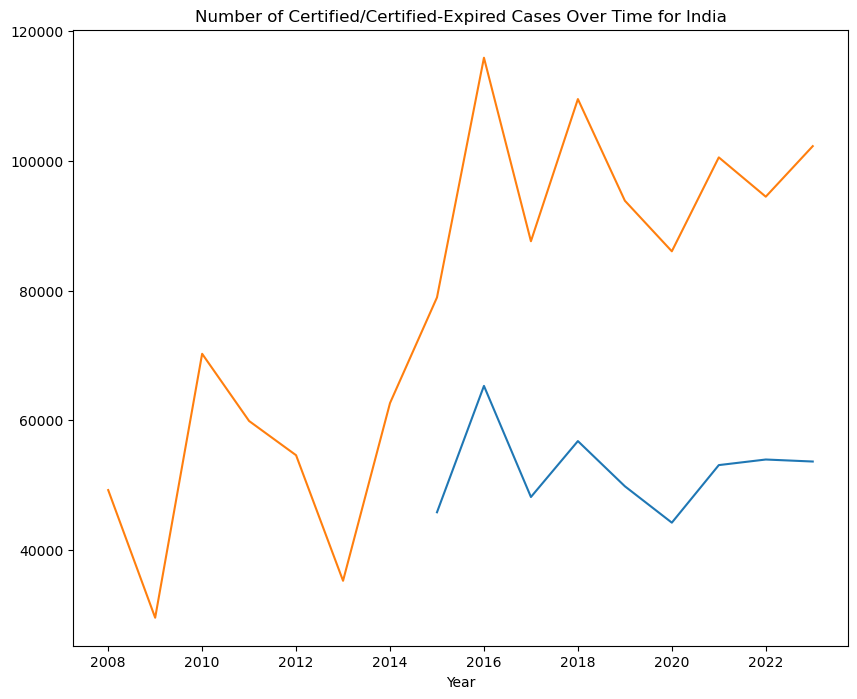

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
all_perm[((all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")) & (all_perm["birth country"] == "INDIA")].groupby("Year").size().plot(kind='line')
plt.title("Number of Certified/Certified-Expired Cases Over Time for India")
all_perm[(all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")].groupby("Year").size().plot(kind='line', ax=ax, label="Certified/Certified-Expired")

<Axes: title={'center': 'Number of Certified/Certified-Expired Cases Over Time for South Korea'}, xlabel='Year'>

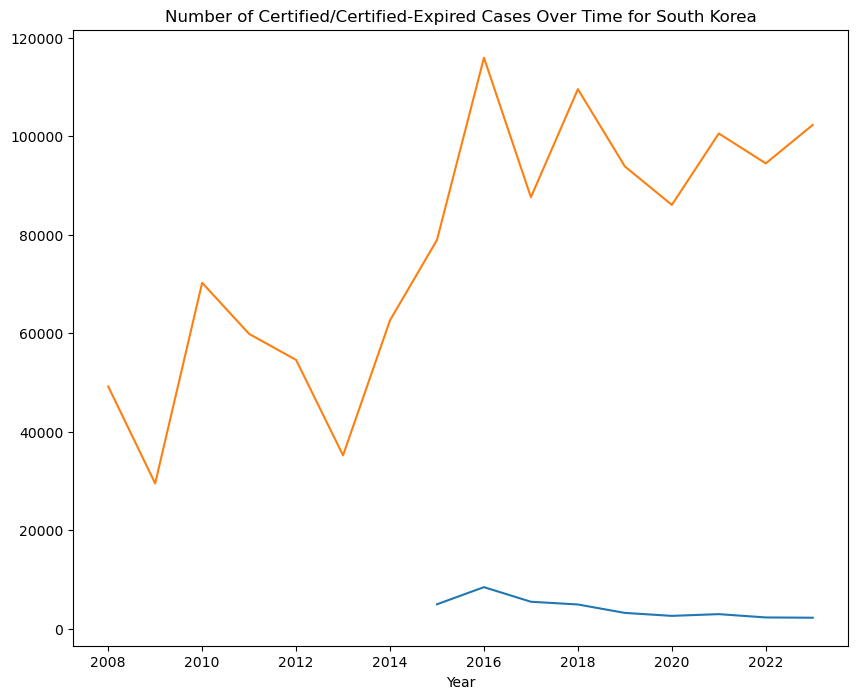

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))
all_perm[((all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")) & (all_perm["birth country"] == "SOUTH KOREA")].groupby("Year").size().plot(kind='line')
plt.title("Number of Certified/Certified-Expired Cases Over Time for South Korea")
all_perm[(all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")].groupby("Year").size().plot(kind='line', ax=ax, label="Certified/Certified-Expired")

Now I want to explore how education level influences the greencard application.

<Axes: ylabel='education'>

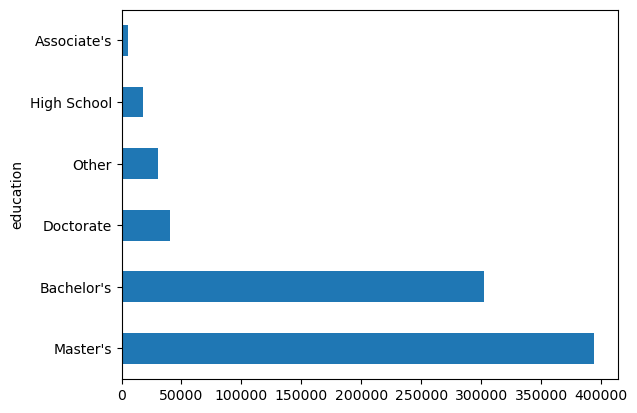

In [29]:
all_perm[(all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")].groupby("education").size().sort_values(ascending=False).plot(kind='barh')

<Figure size 1000x600 with 0 Axes>

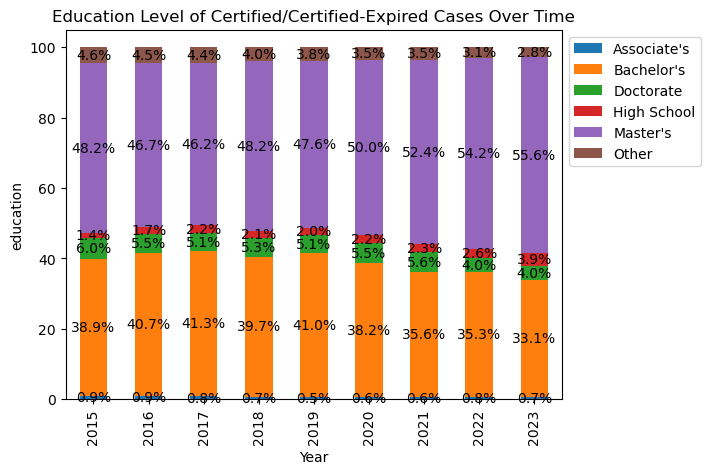

In [51]:
test_stacked = all_perm[(all_perm["case status"] == "Certified") | (all_perm["case status"] == "Certified-Expired")]
plot_stacked_bar(test_stacked, "Education Level of Certified/Certified-Expired Cases Over Time", "Year", "education")

<Figure size 1000x600 with 0 Axes>

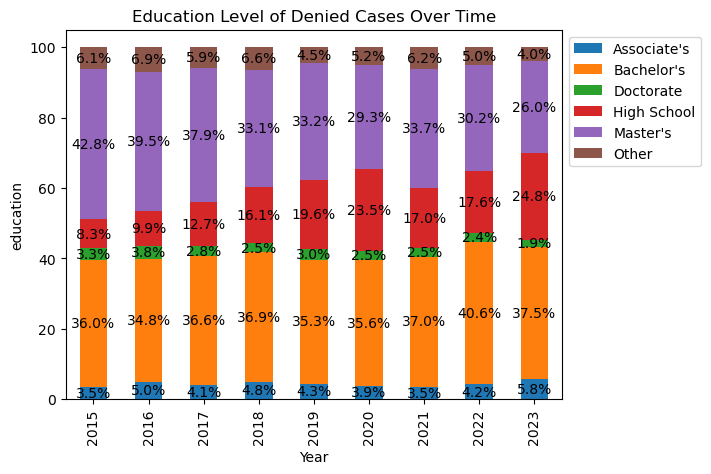

In [49]:
test_stacked = all_perm[all_perm["case status"] == "Denied"]
plot_stacked_bar(test_stacked, "Education Level of Denied Cases Over Time", "Year", "education")

To further analyze the impact of education, I want to explore more about majors.\
Since there're more than 60k different major names in our datset, I need to do a k-means clustering first.

In [45]:
majors = all_perm[all_perm["major"].notna()]["major"].unique()
majors = majors.tolist()

In [26]:
labels = vectorize_TFIDF_cluster(majors, n_clusters=7)
print(labels)

[6 1 5 ... 1 2 2]


In [29]:
major_label = dict(zip(majors, labels))

In [ ]:
# Create a dictionary where the keys are the cluster labels and the values are lists of the majors in each cluster
clusters = {i: [] for i in range(max(major_label.values()) + 1)}
for major, label in major_label.items():
    clusters[label].append(major)

In [32]:
all_perm['label'] = all_perm['major'].map(major_label)

In [36]:
all_perm.to_csv("perm_data_with_major_label.csv", index=False)

Here is the result.\
Since cluster 0 and 6 are pretty similar, we regard them as the same category.\
Based on the figures, we can see that people who study CS/IS/EE are the majority of greencard applicants.

Text(0, 0.5, 'Cluster Number')

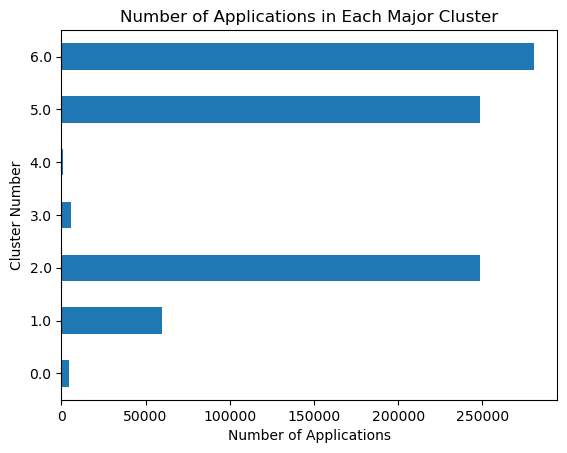

In [37]:
all_perm[all_perm["label"].notna()].groupby("label").size().plot(kind='barh')
plt.title("Number of Applications in Each Major Cluster")
plt.xlabel("Number of Applications")
plt.ylabel("Cluster Number")

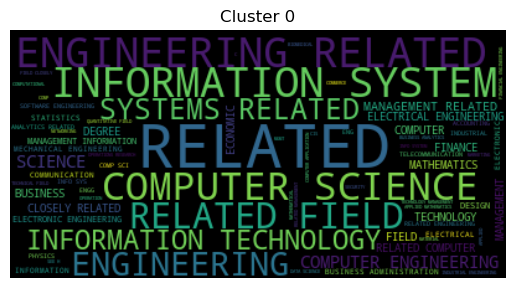

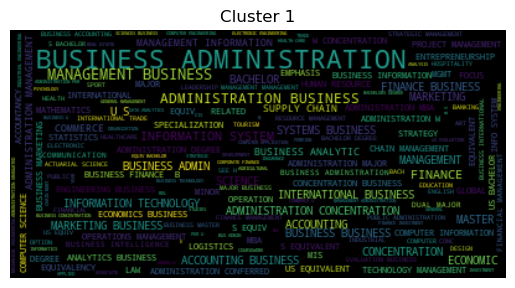

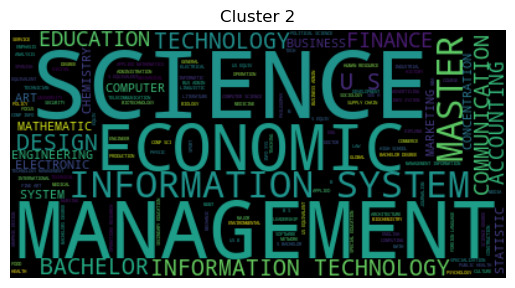

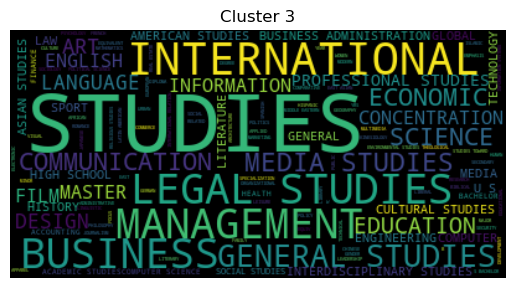

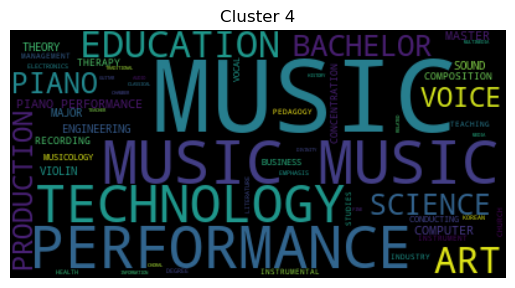

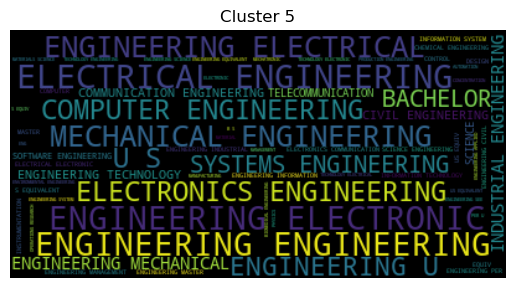

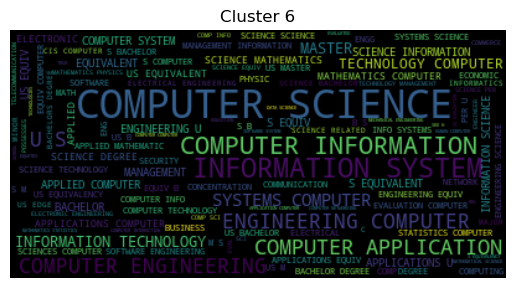

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary where the keys are the cluster labels and the values are lists of the documents in each cluster
clusters = {i: [] for i in range(max(labels) + 1)}
for i, label in enumerate(labels):
    clusters[label].append(majors[i])

# For each cluster, join all the documents into a single string and generate a word cloud
for label, documents in clusters.items():
    text = ' '.join(documents)
    wordcloud = WordCloud().generate(text)

    # Display the generated image
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Cluster {label}')
    plt.show()

# Conclusion

My hypotheses\
(1) The policy and laws' impact
* Under the impact of "The Chinese Exclusion Act of 1882", the number of Chinese immigrants (1880-1889) would decrease, but they would still be the majority. [Correct]
* Under the impact of "The Immigration Act of 1924", the number of immigrants that from Southern and Eastern Europe would decrease, the number of immigrants that from Western and Northern Europe would increase, but the overall number of European immigrants would decrease. [Incorrect]

(2) Greencard type
* Asian will be the majority of employment-based greencard. [Correct]
* North American will be the majority of immediate relatives greencard. [Correct]
* California is the most popular destination. [Partially correct. Texas is also receiving many immigrants, which I never knew before]

(3) PERM greencard
* The political party in power may have a siginificant impact on immigration numbers. [Partially correct. Different parties will introduce different immigration policies, which definately will have a direct impact on immigration numbers.]
* People with master degree are the majority of approved cases. [Correct]
* People with High school diploma are the majority of denied cases. [Incorrect. The majority is people with Bachelor degree.]
* People who study STEM are the majority of greencard applicants. [Correct]

# Respond to presentation feedback

(1) I didn't express my hypotheses clearly in my presentation, therefore I add the conclusion part above, to make everything easier to follow.

(2) My analysis about "how political party in office influence the number of immigration" is a little bit vague.\
Prof. Weible gave me some suggestions like "group data by nations to see whether there’s a political factors impact.\
When you apply for the greencard, you'll be categorized by your birth place instead of your coutry of citizenship.

(3) About the re-apply. The dataset does contain a column indicating that whether the applicant is re-applying. But there're only very few data samples. And we also don't know why the applicant re-apply (denied or certified-expired?) and how many times the applicant tries to apply.

<Figure size 1000x600 with 0 Axes>

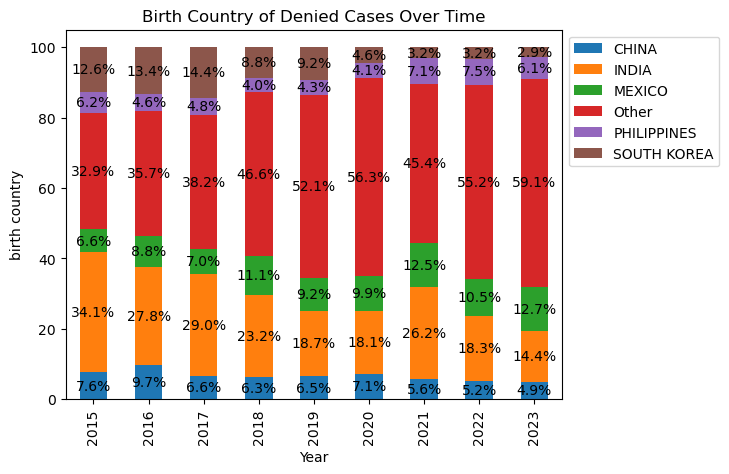

In [24]:
top_countries = all_perm["birth country"].value_counts().nlargest(5).index.tolist()
all_perm_top_countries = all_perm.copy()
all_perm_top_countries["birth country"] = all_perm_top_countries["birth country"].apply(lambda x: x if x in top_countries else "Other")
denied_cases = all_perm_top_countries[(all_perm_top_countries["case status"] == "Denied") & (all_perm_top_countries["Year"] >= 2015)]
plot_stacked_bar(denied_cases, "Birth Country of Denied Cases Over Time", "Year", "birth country")

<Figure size 1000x600 with 0 Axes>

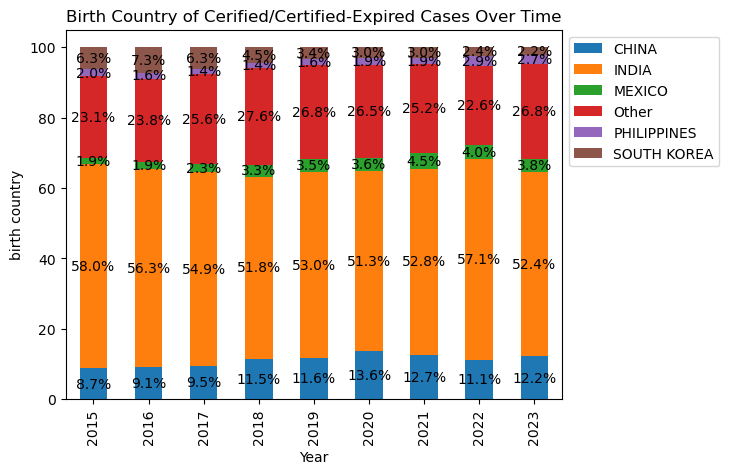

In [27]:
top_countries = all_perm["birth country"].value_counts().nlargest(5).index.tolist()
all_perm_top_countries = all_perm.copy()
all_perm_top_countries["birth country"] = all_perm_top_countries["birth country"].apply(lambda x: x if x in top_countries else "Other")
denied_cases = all_perm_top_countries[((all_perm_top_countries["case status"] == "Certified") | (all_perm_top_countries["case status"] == "Certified-Expired")) & (all_perm_top_countries["Year"] >= 2015)]
plot_stacked_bar(denied_cases, "Birth Country of Cerified/Certified-Expired Cases Over Time", "Year", "birth country")